In [1]:
from impact_score.path_reference.folder_ref import datasets_reference
from impact_score.model.lgbm_model import ValorantLGBM, get_trained_model_from_csv
import lightgbm

from pathlib import Path
import os
import pandas as pd
import shap

vm = get_trained_model_from_csv()
# vm = ValorantLGBM()
# vm.setup_dataframe("4000.csv")
# vm.train_model(optuna_study=False)
model: lightgbm.LGBMClassifier = vm.model
features = model.feature_name_

def get_dataset_reference():
    model_improvement_folder = Path(os.getcwd())
    model_folder = model_improvement_folder.parent
    impact_score_folder = model_folder.parent
    return Path(impact_score_folder, "datasets")

filename = "100.csv"
df = pd.read_csv(f"{datasets_reference()}\\{filename}")

[LightGBM] [Warning] min_data_in_leaf is set=83, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=83
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=3, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=3
[LightGBM] [Warning] num_threads is set=6, n_jobs=-1 will be ignored. Current value: num_threads=6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


In [2]:
df.head()

,RegularTime,SpikeTime,MapName,FinalWinner,RoundID,MatchID,RoundNumber,RoundTime,ATK_loadoutValue,ATK_weaponValue,...,Controller_loadout_diff,Duelist_loadout_diff,Loadout_diff,MapName_Ascent,MapName_Bind,MapName_Breeze,MapName_Fracture,MapName_Haven,MapName_Icebox,MapName_Split
0,100,0,Icebox,0,1155526,71969,1,0,3650,1500,...,1000,800,0,0,0,0,0,0,1,0.0
1,70,0,Icebox,0,1155526,71969,1,29811,3650,1500,...,1000,800,750,0,0,0,0,0,1,0.0
2,70,0,Icebox,0,1155526,71969,1,30118,3650,1500,...,1000,800,1350,0,0,0,0,0,1,0.0
3,66,0,Icebox,0,1155526,71969,1,34226,3250,1500,...,1000,800,950,0,0,0,0,0,1,0.0
4,0,45,Icebox,0,1155526,71969,1,35097,3250,1500,...,1000,800,950,0,0,0,0,0,1,0.0


In [3]:
x = df[features]
y = df["FinalWinner"]

In [4]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# Calculate Shap values
shap_values = explainer.shap_values(x)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


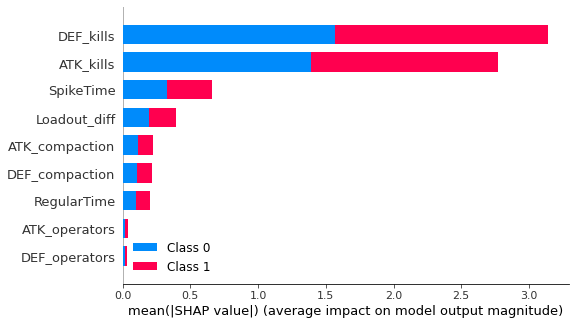

In [5]:
shap.summary_plot(shap_values, x)

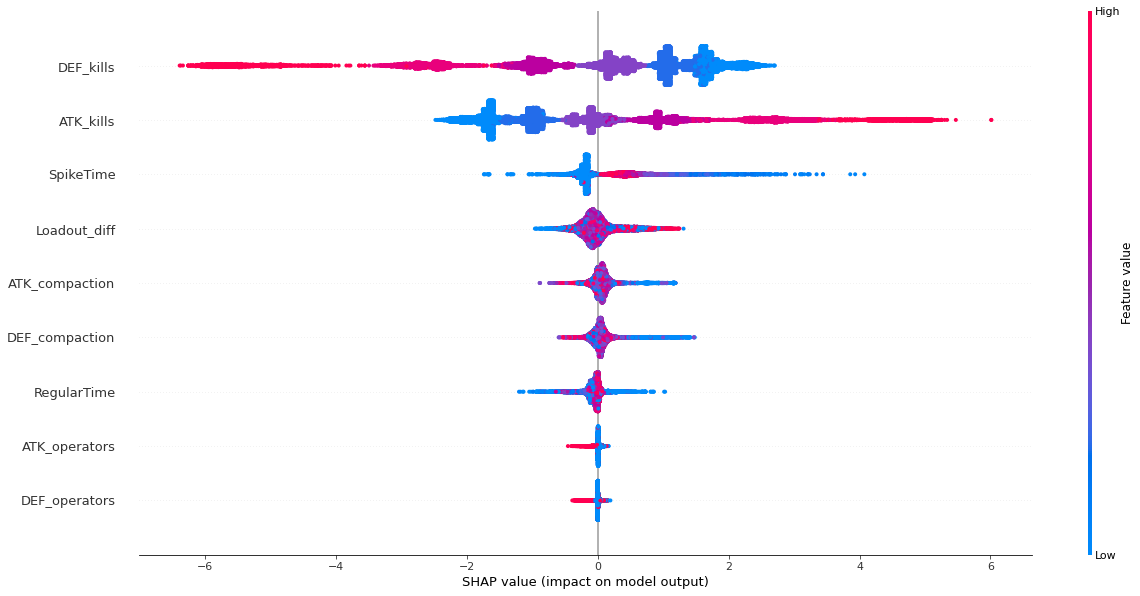

In [6]:
shap.summary_plot(shap_values[1], x, plot_size=(20,10))

In [ ]:
df.iloc[-1]

In [ ]:
shap.decision_plot(explainer.expected_value[0], shap_values[0][1], x, link="logit", highlight=0)

In [ ]:
shap.dependence_plot("Loadout_diff", shap_values[0], x)

In [ ]:
shap.dependence_plot("DEF_operators", shap_values[0], x)

In [ ]:
shap.dependence_plot("DEF_compaction", shap_values[0], x)

In [ ]:
shap.dependence_plot("atkCompaction", shap_values[0], x)

In [ ]:
shap.dependence_plot("SpikeTime", shap_values[0], x)

In [ ]:
shap.dependence_plot("RegularTime", shap_values[0], x)

In [ ]:
shap.dependence_plot("ATK_Sentinel", shap_values[0], x)

In [ ]:
x.iloc[450]

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[1][449], x, link="logit", highlight=0)

In [ ]:
shap.initjs()
columIndex= 29
shap.force_plot(explainer.expected_value[1], shap_values[1][columIndex,:], x.iloc[columIndex,:], link="logit")

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[0][:20], x)